# Planning Astronomical Observations

This exercise makes use of `astroplan`, an `astropy` affiliated package, so you will need to add it:

`
conda activate astr250
conda install -c astropy astroplan
`

You may also find this tutorial useful
https://astroplan.readthedocs.io/en/latest/tutorials/summer_triangle.html

In [1]:
import sys
print(sys.version)
import numpy
print('numpy',numpy.__version__)
import astropy
print('astropy',astropy.__version__)
import astroplan
print('astroplan',astroplan.__version__)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy 1.20.3
astropy 5.0
astroplan 0.8


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
# Basic coordinates
from astropy.coordinates import EarthLocation, SkyCoord, AltAz
# Astroplan
import astroplan as ap
from astroplan import download_IERS_A
download_IERS_A()
import astroplan.plots as applot
import matplotlib.dates as mdates

In [3]:
from pytz import timezone

## Goals

- Set an RA/Dec for a source that's visible at transit, 

- Location (site)

- 
   

In [6]:
# Close to Wanaka, NZ
location = EarthLocation(lat='-45d00m00s',lon='170d00m00s',height='37000m')
# astroplan observer
obs = ap.Observer(location=location,name='Wanaka') 

In [7]:
obs

<Observer: name='Wanaka',
    location (lon, lat, el)=(170.0 deg, -44.99999999999999 deg, 37000.00000000107 m),
    timezone=<UTC>>

In [52]:
# First guess
target_coords = SkyCoord(12*u.hr, -9*u.deg,frame='icrs')

In [53]:
target_coords

<SkyCoord (ICRS): (ra, dec) in deg
    (180., -9.)>

In [54]:
print('Target', target_coords.to_string('hmsdms'))

Target 12h00m00s -09d00m00s


In [66]:
# All times, by default, are entered as UTC.  Getting astropy to understand
# local times zones is hard.  So we have to do it by hand.
# The current UTC offset for Philadelphia is 5 hours earlier.
# Notice how we define the units of time.
dt = np.arange(-12,13,0.5)*u.hr
utc_offset = 12.0*u.hour
# UTC
local_time0 = Time('2027-04-01 00:00:00')
time0_utc = local_time0 - utc_offset 
times = time0_utc + dt
print('Local time:', local_time0)
print('UTC time:', time0_utc)
print(times)

Local time: 2027-04-01 00:00:00.000
UTC time: 2027-03-31 12:00:00.000
['2027-03-31 00:00:00.000' '2027-03-31 00:30:00.000'
 '2027-03-31 01:00:00.000' '2027-03-31 01:30:00.000'
 '2027-03-31 02:00:00.000' '2027-03-31 02:30:00.000'
 '2027-03-31 03:00:00.000' '2027-03-31 03:30:00.000'
 '2027-03-31 04:00:00.000' '2027-03-31 04:30:00.000'
 '2027-03-31 05:00:00.000' '2027-03-31 05:30:00.000'
 '2027-03-31 06:00:00.000' '2027-03-31 06:30:00.000'
 '2027-03-31 07:00:00.000' '2027-03-31 07:30:00.000'
 '2027-03-31 08:00:00.000' '2027-03-31 08:30:00.000'
 '2027-03-31 09:00:00.000' '2027-03-31 09:30:00.000'
 '2027-03-31 10:00:00.000' '2027-03-31 10:30:00.000'
 '2027-03-31 11:00:00.000' '2027-03-31 11:30:00.000'
 '2027-03-31 12:00:00.000' '2027-03-31 12:30:00.000'
 '2027-03-31 13:00:00.000' '2027-03-31 13:30:00.000'
 '2027-03-31 14:00:00.000' '2027-03-31 14:30:00.000'
 '2027-03-31 15:00:00.000' '2027-03-31 15:30:00.000'
 '2027-03-31 16:00:00.000' '2027-03-31 16:30:00.000'
 '2027-03-31 17:00:00.000' '2

C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 50 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2d

In [67]:
print('Is it night?',obs.is_night(time0_utc))
print('Is target up?',obs.target_is_up(time0_utc, target_coords))

Is it night? True
Is target up? True


C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utcut1" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [68]:
target_transit = obs.target_meridian_transit_time(time0_utc, target_coords)
target_rise = obs.target_rise_time(time0_utc, target_coords)
target_set = obs.target_set_time(time0_utc, target_coords)

C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 150 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utcut1" yielded 150 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [69]:
print('target rise time (UTC)',target_rise.datetime)
print('target transit (UTC)',target_transit.datetime)
print('target set time (UTC)',target_set.datetime)
print('target rise time (local)',(target_rise+utc_offset).datetime)
print('target transit (local)',(target_transit+utc_offset).datetime)
print('target set time (local)',(target_set+utc_offset).datetime)

target rise time (UTC) 2027-03-31 05:30:49.514906
target transit (UTC) 2027-03-31 12:09:17.769898
target set time (UTC) 2027-03-31 18:42:51.965007
target rise time (local) 2027-03-31 17:30:49.514906
target transit (local) 2027-04-01 00:09:17.769898
target set time (local) 2027-04-01 06:42:51.965007


C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 100 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 100 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utcut1" yielded 100 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\astroplan\plots\time_dependent.py:399: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(time.plot_date, masked_altitude, label=targe

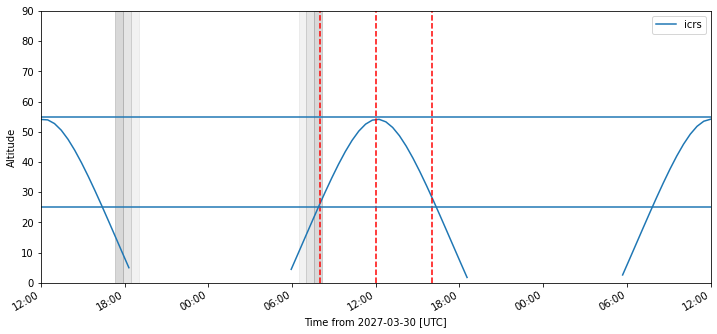

In [70]:
# I don't think there's a way to get astroplan to NOT plot UTC
plt.figure(figsize=(12,5))
applot.plot_altitude([target_coords], obs, time0_utc+np.linspace(-24, 24, 100)*u.hr, brightness_shading=True)
#applot.plot_altitude(polaris, philly_obs, time0_utc+np.linspace(-24, 24, 100)*u.hr, brightness_shading=True)
#applot.plot_altitude(sgrastar, philly_obs, time0_utc, brightness_shading=True)
plt.axvline(time0_utc.datetime64,color='red',linestyle='--')
plt.axvline((time0_utc-4*u.hr).datetime64,color='red',linestyle='--')
plt.axvline((time0_utc+4*u.hr).datetime64,color='red',linestyle='--')
plt.axhline(25)
plt.axhline(55)
plt.legend()
plt.savefig('observation_planning.pdf')
plt.show()

In [71]:
print(time0_utc)
print(time0_utc-4*u.hr)
print(time0_utc+4*u.hr)

2027-03-31 12:00:00.000
2027-03-31 08:00:00.000
2027-03-31 16:00:00.000


C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 50 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utcut1" yielded 50 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 50 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


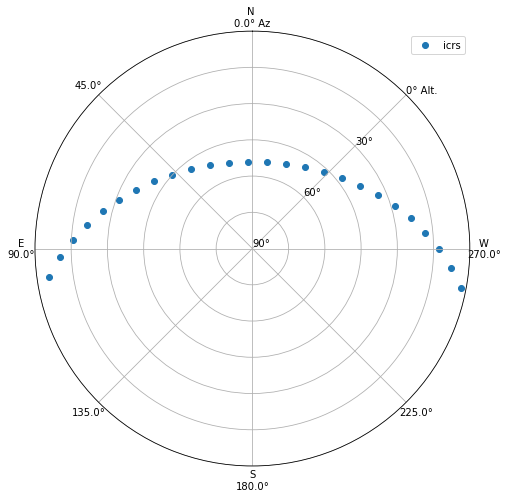

In [73]:
plt.figure(figsize=(8,8))
applot.plot_sky(target_coords, obs, times)
plt.legend()
plt.show()

In [76]:
target_coords_altaz = target_coords.transform_to(AltAz(obstime=times, location=location))

For help on getting your dates to format nicely in plots, see https://matplotlib.org/3.1.1/api/dates_api.html

C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 50 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


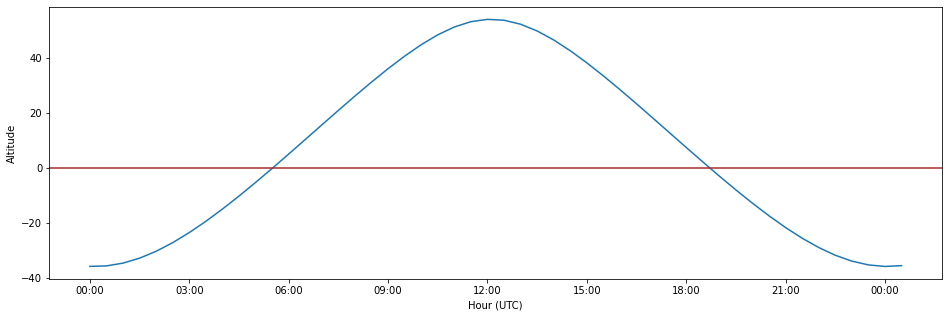

In [77]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(times.datetime64, target_coords_altaz.alt)
# Plot every hour (the default for HourLocator)
#ax.format_xdata = mdates.HourLocator()
# Format as HH:MM
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.axhline(0, color='brown')
plt.ylabel('Altitude')
plt.xlabel('Hour (UTC)')
plt.show()

C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 50 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 50 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 50 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 50 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\jaguirre\anaconda3\envs\astr250\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "

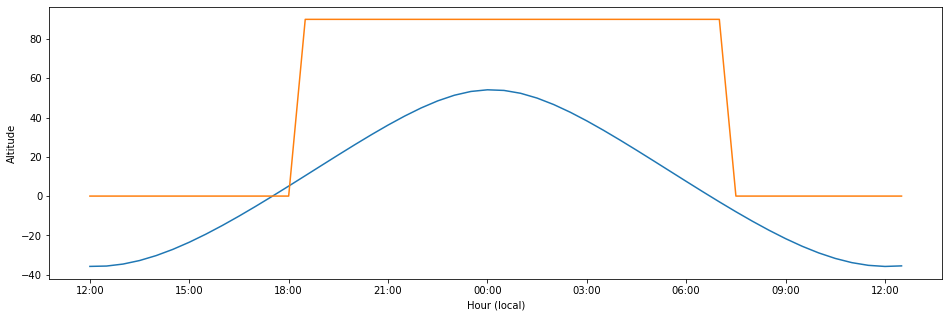

In [78]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot((times+utc_offset).datetime64, target_coords_altaz.alt)
ax.plot((times+utc_offset).datetime64, obs.is_night(times)*90)
# Plot every hour (the default for HourLocator)
ax.format_xdata = mdates.HourLocator()
# Format as HH:MM
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Altitude')
plt.xlabel('Hour (local)')
plt.show()